### Quantum Approximate Optimization Algorithm

In [3]:
import itertools
import qiskit
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from numpy import *
from qiskit import BasicAer, IBMQ, Aer
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute
from qiskit.compiler import transpile
from qiskit.tools.visualization import plot_histogram
from qiskit.quantum_info.analysis import *
from qiskit.tools.visualization import circuit_drawer, plot_bloch_multivector

pi = np.pi

In [4]:
backend = BasicAer.get_backend('qasm_simulator')
shots = 99999

<img style="float:center;" src="./maxcut.png" width = "20%">

！[maxcut](https://github.com/reTELEport/Quantum-Algorithm/blob/master/maxcut.png)

<img style="float:center;" src="./maxcut2.png" width = "20%">

$$|z_{i}\rangle = |1\rangle , |0\rangle$$ 


$$|s\rangle = |z_{1}\rangle \otimes |z_{2}\rangle \otimes |z_{3}\rangle \otimes |z_{4}\rangle \otimes |z_{5}\rangle 
 = |z_{1}z_{2}z_{3}z_{4}z_{5}\rangle$$
 
 Objective operator: 
 
 $$C = \sum_{\langle ij \rangle}C_{\langle ij \rangle}$$
 
 $$ C_{\langle ij \rangle} |z_{i}z_{j} \rangle = 1 \ |z_{i}z_{j} \rangle , \ z_{i} \neq  z_{j} 
  \\  C_{\langle ij \rangle} |z_{i}z_{j} \rangle = 0 \ |z_{i}z_{j} \rangle , \ z_{i} =  z_{j}$$ 

$$ U(C,\alpha) = e^{-i  \alpha  C} = e^{-i \ \alpha \ \sum_{\langle ij \rangle}C_{\langle ij \rangle}} = \prod_{\langle ij \rangle} e^{- i \alpha C_{\langle ij \rangle} } $$

$$ e^{- i \alpha C_{\langle ij \rangle} } \vert 00 \rangle = \vert 00 \rangle \\ 
   e^{- i \alpha C_{\langle ij \rangle} } \vert 11 \rangle = \vert 11 \rangle \\
   e^{- i \alpha C_{\langle ij \rangle} } \vert 10 \rangle = e^{- i \alpha} \vert 10 \rangle\\
   e^{- i \alpha C_{\langle ij \rangle} } \vert 01 \rangle = e^{- i \alpha} \vert 01 \rangle$$

$$ B=\sum_{j=1}^{n} \sigma_{j}^{x} \\
   U(B,\beta) = e^{-i\beta B} = e^{-i\beta \sum_{j=1}^{n} \sigma_{j}^{x} }$$

$$|\psi\rangle = \sum_{z\in\{0,1\}^n} a_{z} \vert z \rangle$$

$$|\vec{\alpha},\vec{\beta}\rangle = U(B,\beta_{p})U(C,\alpha_{p})\cdots U(B,\beta_{2})U(C,\alpha_{2})U(B,\beta_{1})U(C,\alpha_{1})|\psi\rangle $$

$$ \vec{\alpha} = (\alpha_{1},\alpha_{2},\cdots,\alpha_{p})$$

$$ \vec{\beta} = (\beta_{1},\beta_{2},\cdots,\beta_{p})$$

### Initiation

$$|\psi_{0}\rangle = |00000\rangle$$

$$ H|0\rangle = \frac{|0\rangle + |1\rangle}{\sqrt{2}}$$

$$H^{\otimes n}|\psi_{0}\rangle =  (\frac{|0\rangle + |1\rangle}{\sqrt{2}})^{\otimes n} $$

In [16]:
graph = [[0,1],[1,4],[1,2],[2,3],[3,4],[4,0]]

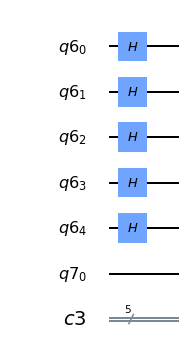

In [13]:
node = QuantumRegister(5)
aux = QuantumRegister(1)
creq = ClassicalRegister(5)
circ = QuantumCircuit(node,aux,creq)
circ.h(node)
circ.draw(output = 'mpl')

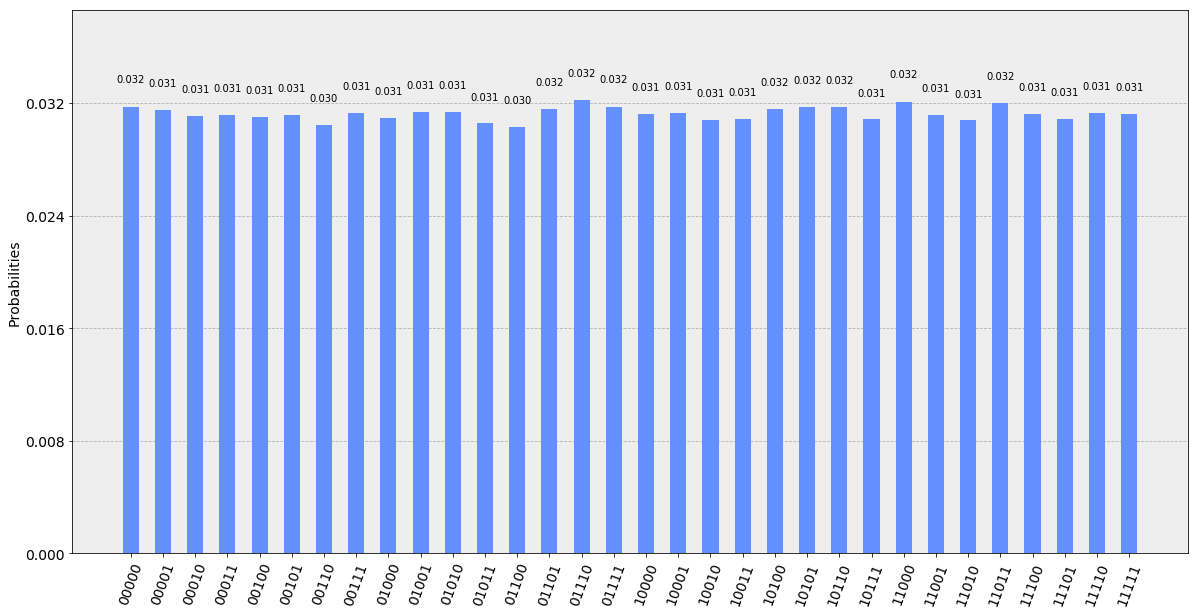

In [14]:
circ.measure(node, creq)
results = execute(circ, backend = backend, shots = shots).result()
answer = results.get_counts()
plot_histogram(answer, figsize=(20,10))

### Implementation

In [18]:
def uz(circ, node, aux, graph, a):      # theta takes value in [0, pi]
    step_len = 1/100
    for[i,j] in graph:
         circ.cx(node[i],node[j])
         circ.rz(-4*step_len*pi*a,node[j])
         circ.cx(node[i],node[j])
         circ.rz(4*step_len*pi*a,aux)
         circ.barrier()

def ux(circ,node,b):       # theta takes value in [0, pi]
    step_len = 1/100
    circ.rx(4*step_len*pi*b, node)
    circ.barrier()

def maxcut(circ, node, aux, creq,graph, ang_zip):
    for a,b in ang_zip:
        uz(circ, node, aux, graph, a)
        ux(circ, node, b)
    circ.measure(node, creq)

def mean(graph,answer):
    sum2 = 0
    for k,v in answer.items():
        sum1 = 0
        for [i,j] in graph:
            if k[i] != k[j]:
                sum1 += 1
        sum2 += sum1*v
    mean = sum2/shots
    return(mean)

def outcome(n,graph,ang1,ang2):
    ang_zip = zip(ang1,ang2)
    node = QuantumRegister(n)
    aux = QuantumRegister(1)
    creq = ClassicalRegister(n)
    circ = QuantumCircuit(node,aux,creq)
    circ.h(node)
    maxcut(circ, node, aux, creq,graph, ang_zip)
    results = execute(circ, backend = backend, shots = shots).result()
    answer = results.get_counts()
    out = mean(graph,answer)
    return(out)

$$p=1$$
$$\vec{\alpha} = (39) \\
  \vec{\beta} = (45) $$
  
$$|\vec{\alpha},\vec{\beta}\rangle = U(B,\beta_{2})U(C,\alpha_{2})U(B,\beta_{1})U(C,\alpha_{1})|\psi\rangle $$

In [62]:
circ = QuantumCircuit(node,aux,creq)
circ.h(node)
a=[39]
b=[45]
ang_zip = zip(a,b)
maxcut(circ, node, aux, creq,graph, ang_zip)

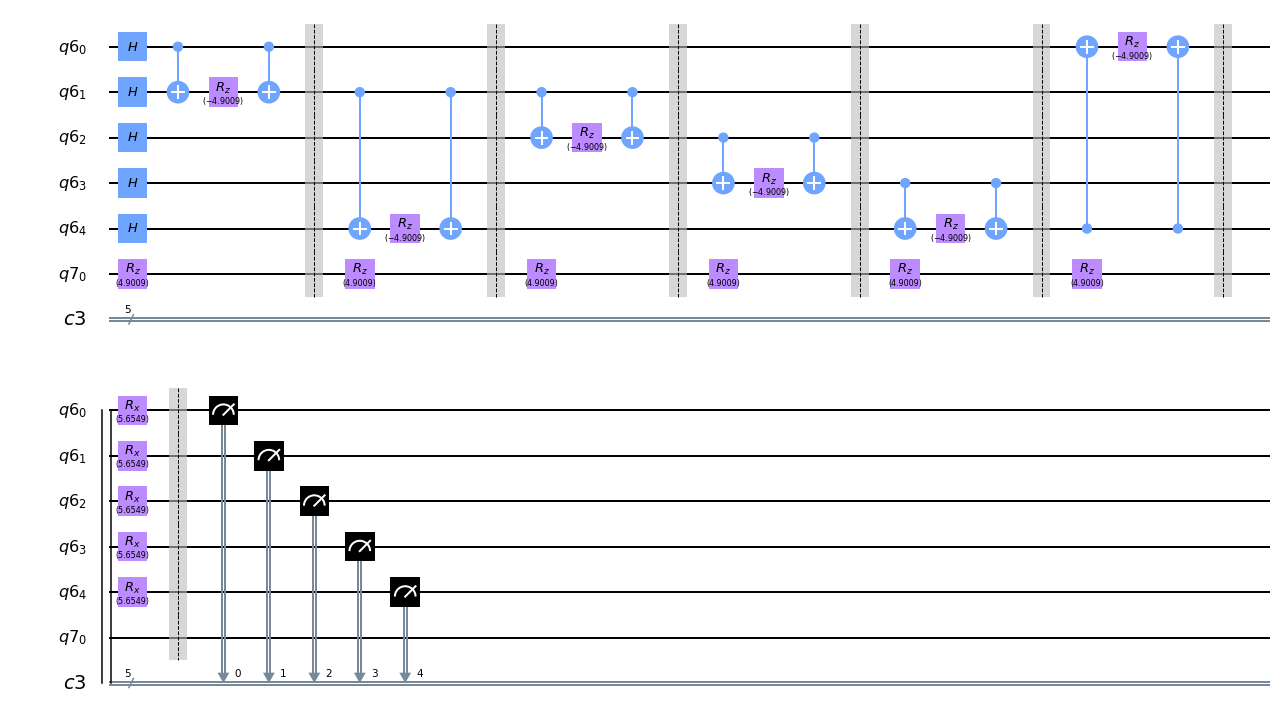

In [63]:
circ.draw(output = 'mpl')

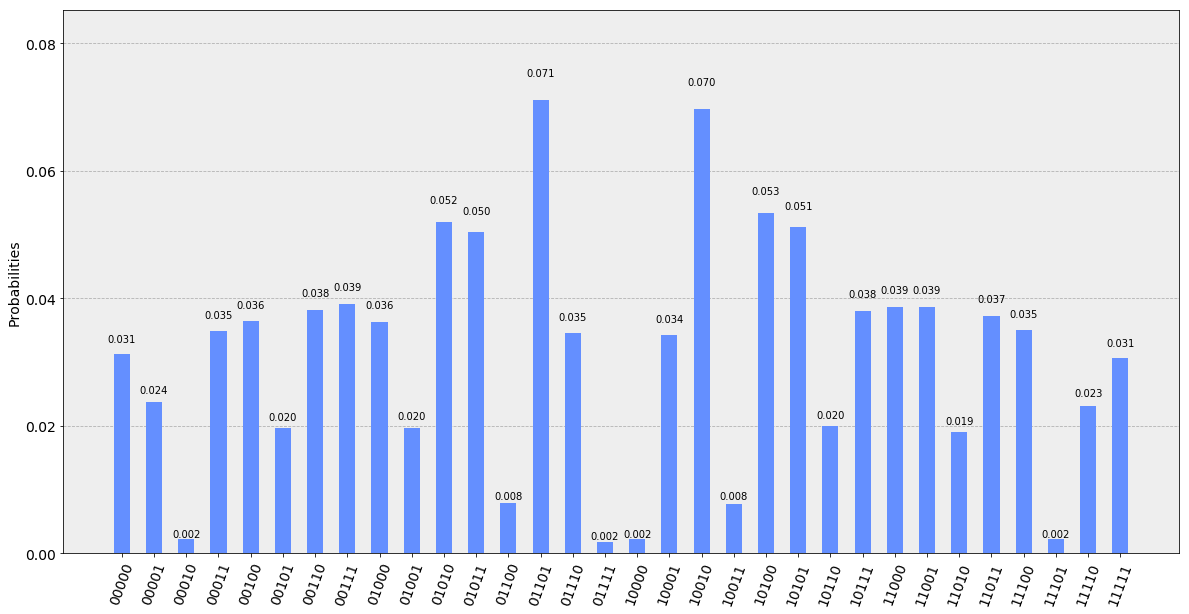

In [64]:
results = execute(circ, backend = backend, shots = shots).result()
answer = results.get_counts()
plot_histogram(answer, figsize=(20,10))

$$ C_{mean} = \langle \vec{\alpha},\vec{\beta}| C|\vec{\alpha},\vec{\beta}\rangle$$

In [67]:
C_mean = outcome(5,graph,a,b)
C_mean

3.228022280222802